## 거래사기 지표

### 랜덤 포레스트

#### 모든 데이터로 학습

In [51]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fdDataset = pd.read_csv('./dataset/FraudDetectionDataset.csv')
#print(fdDataset.head())
print(fdDataset.isnull().sum()) # 결측치 확인
#print(fdDataset.loc['Transaction_Type'].values)
#fdDataset['Transaction_Type'] = fdDataset['Transaction_Type'].map({'ham': 0, 'spam': 1})  # 레이블을 숫자로 변환
fdDataset.dropna(inplace=True)  # 결측치 제거

print(fdDataset.isnull().sum())
transaction_Type_List = list(fdDataset['Transaction_Type'].unique())
print(transaction_Type_List)
device_Used_List = list(fdDataset['Device_Used'].unique())
print(device_Used_List)
location_List = list(fdDataset['Location'].unique())
print(location_List)
payment_Method_List = list(fdDataset['Payment_Method'].unique())
print(payment_Method_List)

# 특성(X)과 타겟(y) 분리
X = fdDataset.iloc[:,2:-1].values  # 첫 두 열(거래 ID, 유저 ID) 과 마지막 열(사기거래 여부) 제외
y = fdDataset.iloc[:,-1].values  # 마지막 열

# 문자열을 숫자로 변환
for x in X:
    for idx, tt in enumerate(transaction_Type_List):
        if x[1] == tt:
            x[1] = 1+idx
            
    for idx, du in enumerate(device_Used_List):
        if x[3] == du:
            x[3] = 1+idx
    
    for idx, l in enumerate(location_List):
        if x[4] == l:
            x[4] = 1+idx
    
    for idx, pm in enumerate(payment_Method_List):
        if x[-1] == pm:
            x[-1] = 1+idx


# 데이터 프레임으로 변환
Xdf = pd.DataFrame(X, columns=fdDataset.columns[2:-1])     
print(Xdf)

# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xdf)
X_scaled = pd.DataFrame(X_scaled, columns=Xdf.columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest 모델 생성
# 하이퍼파라미터 튜닝을 위해 GridSearchCV 사용
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [4, 6, 8],       # 트리의 최대 깊이
    'min_samples_split': [2, 4],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2]    # 리프 노드에 있어야 하는 최소 샘플 수
}

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 교차 검증 cv =3 : 훈련 데이터를 3개의 FOLD(묶음)으로 나누어서 두개를 훈련, 나머지는 검증 용도로 활용
# 교차 검증은 최적의 하이퍼 파라미터 값을 찾기 위해서 사용됨
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 모델 학습 (GridSearchCV를 통한 최적의 파라미터를 반영한 학습)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델 저장
best_rf_model = grid_search.best_estimator_

# 테스트 데이터로 예측 (하이퍼 파라미터 튜닝을 통해 최적회된 상태로 예측이 이루어짐)
y_pred = best_rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['일반', '사기']))


Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64
Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64
['ATM Withdrawal', 'Bill P

c:\NEWTEST\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\NEWTEST\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\NEWTEST\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\NEWTEST\.venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\NEWTEST\.venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\NEWTEST\.venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\NEWTEST\.venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\NEWTEST\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\NEWTEST\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.p

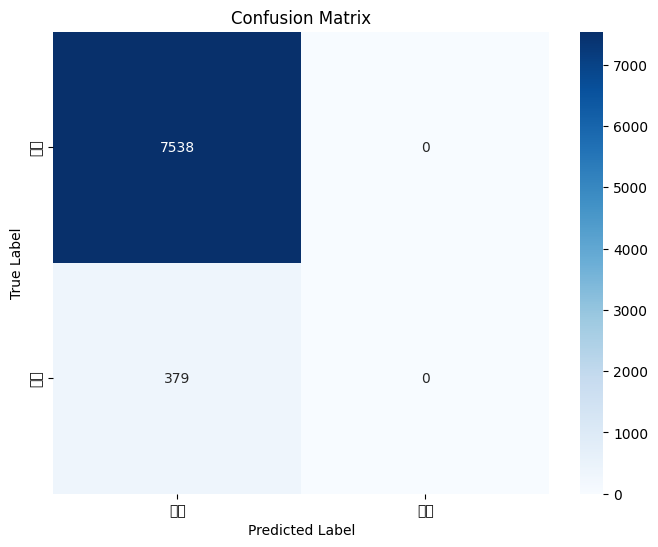

In [52]:
# 혼동 행렬 (Confusion Matrix) 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
# annot=True : 각 셀안의 숫자값을 표시, fmt="d" : 숫자값을 정수형태로 표시, cmap="Blues" : 색상값은 블루
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['일반', '사기'], yticklabels=['일반', '사기'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:

rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)

# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

# 결과 출력
print("모델 성능 평가:")
print("\n교차 검증 점수:")
print(f"평균 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

#### 나이 데이터와 지불방식 데이터를 제외하고 학습